# TALLER 2 PRESENTADO POR CRISTIAN JAIR CARVAJAL VILLAMIZAR - 2190184 - H1 - BENJUMEA

# EJERCICIO 1

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
import math

def sen(grads):
    return math.sin(math.radians(grads))
def cos(grads):
    return math.cos(math.radians(grads))
def tan(grads):
    return math.tan(math.radians(grads))

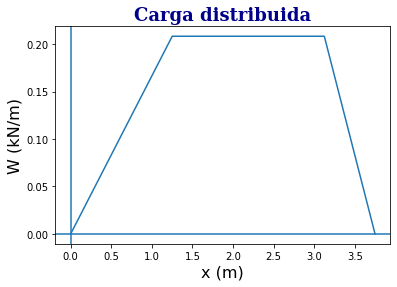

In [76]:
#GEOMETRÍA DE LA VÍGA
X=2+1+9+0+1+8+4
Y=X/3
w=0.005*X+0.01*Y #en kN/m
p=0.05*X #en kN
L1=0.05*X #en m
L2=1.5*L1 #en m
L3=0.5*L1 #en m
L=L1+L2+L3 #en m
viga={
    "L1":L1,
    "L2":L2,
    "L3":L3,
    "L":L,
    "p":p,
    "w":w,
}
#GRAFICAR CARGA W
variablex=np.linspace(0,L,999)
w1= lambda variablex: (w/L1)*variablex
w2= lambda variablex: w
w3= lambda variablex: w*(1-(variablex-(L1+L2))/L3)

carga=np.piecewise(variablex,[variablex<L1, (variablex>L1) & (variablex< L1+L2), (variablex>L1+L2) & (variablex<L)],[w1, w2, w3])
plt.plot(variablex,carga)
plt.axhline(0)
plt.axvline(0)
plt.ylabel("W (kN/m)", size = 16)
plt.xlabel("x (m)", size = 16,)
plt.title("Carga distribuida", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

# Equilibrio

In [77]:
# VARIABLES
Ax,Ay,Ma,x=sp.symbols("Ax Ay Ma x")
# Equilibrio Y
equilibrio_y=Ay+p*sen(45)-(w/2)*(L1+L3)-w*L2
equilibrio_x=Ax-p*cos(45)
equilibrio_m=Ma-(w*L1/2)*(L1*(2/3))-(w*L2)*(L1+(L2/2))-(w*L3/2)*(L1+L2+(L3*(1/3)))+L*p*sen(45)

ecuacion_y=sp.Eq(equilibrio_y,0)
RAy=sp.solve(ecuacion_y)[0]
#En kN

ecuacion_x=sp.Eq(equilibrio_x,0)
RAx=sp.solve(ecuacion_x)[0]
#En kN

ecuacion_m=sp.Eq(equilibrio_m,0)
RMa=sp.solve(ecuacion_m)[0]
#En kN*m

# Cortante y Momento

In [78]:
#tramo I con 0<=X<=L1
w1=viga["w"]*x/viga["L1"]
Vx1=-sp.integrate(w1,x)+RAy
Mx1=sp.integrate(Vx1,x)-RMa

In [79]:
#tramo II con 0<=X<=L2
w2=viga["w"]
Vx2=-sp.integrate(w2,x)+Vx1.subs(x,L1)
Mx2=sp.integrate(Vx2,x)+Mx1.subs(x,L1)

In [80]:
#tramo III con 0<=X<=L3
w3=viga["w"]*(1-x/viga["L3"])
Vx3=-sp.integrate(w3,x)+Vx2.subs(x,L2)
#viga["p"]*sen(45)
Mx3=sp.integrate(Vx3,x)+Mx2.subs(x,L2)

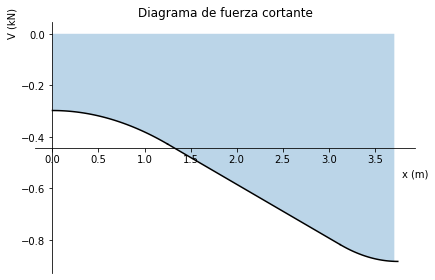

In [81]:
#gráfico de diagrama de fuerza cortante

x_array=np.arange(0,viga["L"],viga["L"]/100)
areaV1=sp.lambdify(x,Vx1)(x_array[x_array<=viga["L1"]])
areaV2=sp.lambdify(x,Vx2)(x_array[(x_array>viga["L1"]) & (x_array<=(viga["L1"]+viga["L2"]))]-viga["L1"])
areaV3=sp.lambdify(x,Vx3)(x_array[(x_array>(viga["L1"]+viga["L2"]))&(x_array<=viga["L"])]-(viga["L1"]+viga["L2"]))
areaV=np.concatenate((areaV1,areaV2,areaV3))

sp.plot((Vx1,(x,0,viga["L1"])),(Vx2.subs(x,x-viga["L1"]),(x,viga["L1"],viga["L1"]+viga["L2"])),(Vx3.subs(x,x-(viga["L1"]+viga["L2"])),(x,viga["L1"]+viga["L2"],viga["L"])),title="Diagrama de fuerza cortante",xlabel="x (m)",ylabel="V (kN)",line_color="black",fill={'x':x_array,'y1':areaV,'alpha':0.3})



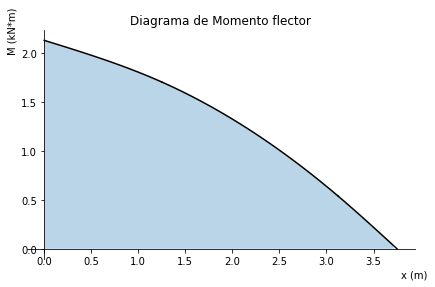

In [82]:
#gráfico de diagrama de momento flector

x_array=np.arange(0,viga["L"],viga["L"]/100)
areaM1=sp.lambdify(x,Mx1)(x_array[x_array<=viga["L1"]])
areaM2=sp.lambdify(x,Mx2)(x_array[(x_array>viga["L1"]) & (x_array<=(viga["L1"]+viga["L2"]))]-viga["L1"])
areaM3=sp.lambdify(x,Mx3)(x_array[(x_array>(viga["L1"]+viga["L2"]))&(x_array<=viga["L"])]-(viga["L1"]+viga["L2"]))
areaM=np.concatenate((areaM1,areaM2,areaM3))

sp.plot((Mx1,(x,0,viga["L1"])),(Mx2.subs(x,x-viga["L1"]),(x,viga["L1"],viga["L1"]+viga["L2"])),(Mx3.subs(x,x-(viga["L1"]+viga["L2"])),(x,viga["L1"]+viga["L2"],viga["L"])),line_color="black",title="Diagrama de Momento flector",xlabel="x (m)",ylabel="M (kN*m)",fill={'x':x_array,'y1':areaM,'alpha':0.3})


In [83]:
#Cálculo de magnitud y posición donde se genera la máxima fuerza cortante y el momento interno máximo

#CORTANTE EN kN
Vmax=0
Vmaxpositivo=np.amax(areaV)
Vmaxnegativo=np.abs(np.amin(areaV))
if Vmaxpositivo>Vmaxnegativo:
    Vmax=Vmaxpositivo
else:
    Vmax=Vmaxnegativo
print("CORTANTE MÁXIMO = ",Vmax," kN en x = ",L , "METROS")

#MOMENTO EN kN*m
Mmax=0
Mmaxpositivo=np.amax(areaM)
Mmaxnegativo=np.abs(np.amin(areaM))
if Mmaxpositivo>Mmaxnegativo:
    Mmax=Mmaxpositivo
else:
    Mmax=Mmaxnegativo
print("MOMENTO MÁXIMO = ", Mmax, " kN*m en x = ",0 , "METROS")

CORTANTE MÁXIMO =  0.8836491014831834  kN en x =  3.75 METROS
MOMENTO MÁXIMO =  2.13455001597861  kN*m en x =  0 METROS


# EJERCICIO 2

In [84]:
#Esfuerzo admisible
esfadm=250 #en MPa
#Lectura de perfiles
perfiles=pd.read_excel("T2.xlsx",usecols="B:E",nrows=10,skiprows=3,index_col='perfil')

h=perfiles["h [mm]"]
b=perfiles["b [mm]"]
t=perfiles["t [mm]"]

In [85]:
#Área
variables=perfiles
variables['A [mm ^ 2]']=b*t+(h-t)*t
#Centroide
centroide=((b*t*(h-t/2))+((h-t)*t*(h-t)/2))/(b*t+(h-t)*t)

#FIGURA DE ARRIBA ES 1
Iz1=(b*pow(t,3)/12)+b*t*pow(centroide-(h-(t/2)),2)
#FUGURA DE ABAJO ES 2
Iz2=(t*pow((h-t),3)/12)+(h-t)*t*pow(centroide-(h-t)/2,2)

#INERCIA
Iz=Iz1+Iz2
variables['Iz [mm ^ 4]']=Iz

#EJE NEURTRO
EjeNeutro=centroide
variables['Eje neutro [mm]']=EjeNeutro

# distancia más lejana al eje neutro a compresión
yc=h-EjeNeutro
# distancia más lejana al eje neutro a tensión
yt=EjeNeutro

#ESFUERZOS
#Esfuerzo máximo a tensión
Esftension=Mmax*pow(10,6)*yt/Iz
variables['Esfuerzo Inf [MPa]']=Esftension
#Esfuerzo máximo a compresión
Esfcompresion=Mmax*pow(10,6)*yc/Iz
variables['Esfuerzo Sup [MPa]']=Esfcompresion

#Tabla que se va a exportar a excel
variables_exportar=variables.loc[:,'A [mm ^ 2]':]
#Tabla con todo
variables

,h [mm],b [mm],t [mm],A [mm ^ 2],Iz [mm ^ 4],Eje neutro [mm],Esfuerzo Inf [MPa],Esfuerzo Sup [MPa]
perfil,,,,,,,,
1,25,50,5.0,350.00,1.501488e+04,18.928571,2690.929257,863.128252
2,30,60,5.5,464.75,2.910029e+04,22.900888,1679.814598,520.730590
3,35,70,6.0,594.00,5.113253e+04,26.873737,1121.856012,339.234415
4,40,80,7.0,791.00,8.866585e+04,30.659292,738.094716,224.869093
5,50,100,8.5,1202.75,2.115530e+05,38.417845,387.632489,116.862875
6,55,115,9.0,1449.00,3.036222e+05,42.642857,299.791378,86.874219
7,60,120,10.0,1700.00,4.318137e+05,46.176471,228.260429,68.332740
8,70,140,11.5,2282.75,7.908459e+05,53.935139,145.574826,43.360219
9,80,160,13.0,2951.00,1.337393e+06,61.693833,98.466619,29.217611


In [86]:
#Filtro de perfiles que soportan los esfuerzos tanto superior como inferior
filtrosup=variables['Esfuerzo Sup [MPa]']<=250
filtroinf=variables['Esfuerzo Inf [MPa]']<=250
variables[filtrosup]
variables[filtroinf]


,h [mm],b [mm],t [mm],A [mm ^ 2],Iz [mm ^ 4],Eje neutro [mm],Esfuerzo Inf [MPa],Esfuerzo Sup [MPa]
perfil,,,,,,,,
7,60,120,10.0,1700.00,4.318137e+05,46.176471,228.260429,68.332740
8,70,140,11.5,2282.75,7.908459e+05,53.935139,145.574826,43.360219
9,80,160,13.0,2951.00,1.337393e+06,61.693833,98.466619,29.217611
10,90,180,15.0,3825.00,2.186057e+06,69.264706,67.632720,20.246738


In [89]:
#Selección del perfil óptimo
areamin=0
indice=0
#Áreas minimas que puede soportar por el esfuerzo inferior y superior
areamininf=variables.loc[filtroinf,'A [mm ^ 2]'].min()
areaminsup=variables.loc[filtrosup,'A [mm ^ 2]'].min()
if areamininf<areaminsup:
    areamin=areaminsup
    indice=variables.loc[filtrosup,'A [mm ^ 2]'].idxmin()
else:
    areamin=areamininf
    indice=variables.loc[filtroinf,'A [mm ^ 2]'].idxmin()
print("EL ÁREA MÍNIMA SERÍA = ",areamin)

#Selección de las columnas que se deben colocar en el respectivo lugar de la hoja de cálculo
perfil_optimo1=perfiles.loc[[indice],'b [mm]']
perfil_optimo2=perfiles.loc[[indice],'h [mm]']
perfil_optimo3=perfiles.loc[[indice],'t [mm]']
perfil_optimo4=perfiles.loc[[indice],'A [mm ^ 2]']
perfil_optimo5=perfiles.loc[[indice],'Esfuerzo Inf [MPa]':'Esfuerzo Sup [MPa]']

EL ÁREA MÍNIMA SERÍA =  1700.0


In [90]:
#Exportar en excel
from openpyxl import load_workbook
with pd.ExcelWriter('T2.xlsx',mode='a',if_sheet_exists='overlay',engine='openpyxl') as writer:
    book=load_workbook('T2.xlsx')
    writer.book=book
    writer.sheets=dict((ws.title,ws)for ws in book.worksheets)
    #PARA PERFIL ÓPTIMO SELECCIONADO
    perfil_optimo1.to_excel(writer,startrow=18,startcol=6,sheet_name='Perfiles',index=None)
    perfil_optimo2.to_excel(writer,startrow=18,startcol=7,sheet_name='Perfiles',index=None)
    perfil_optimo3.to_excel(writer,startrow=18,startcol=8,sheet_name='Perfiles',index=None)
    perfil_optimo4.to_excel(writer,startrow=18,startcol=9,sheet_name='Perfiles',index=None)
    perfil_optimo5.to_excel(writer,startrow=18,startcol=10,sheet_name='Perfiles',index=None)
    
    #PARA VARIABLES SOLICITADAS DE CADA PERFIL
    variables_exportar.to_excel(writer,startrow=3,startcol=10,sheet_name='Perfiles',index=None)